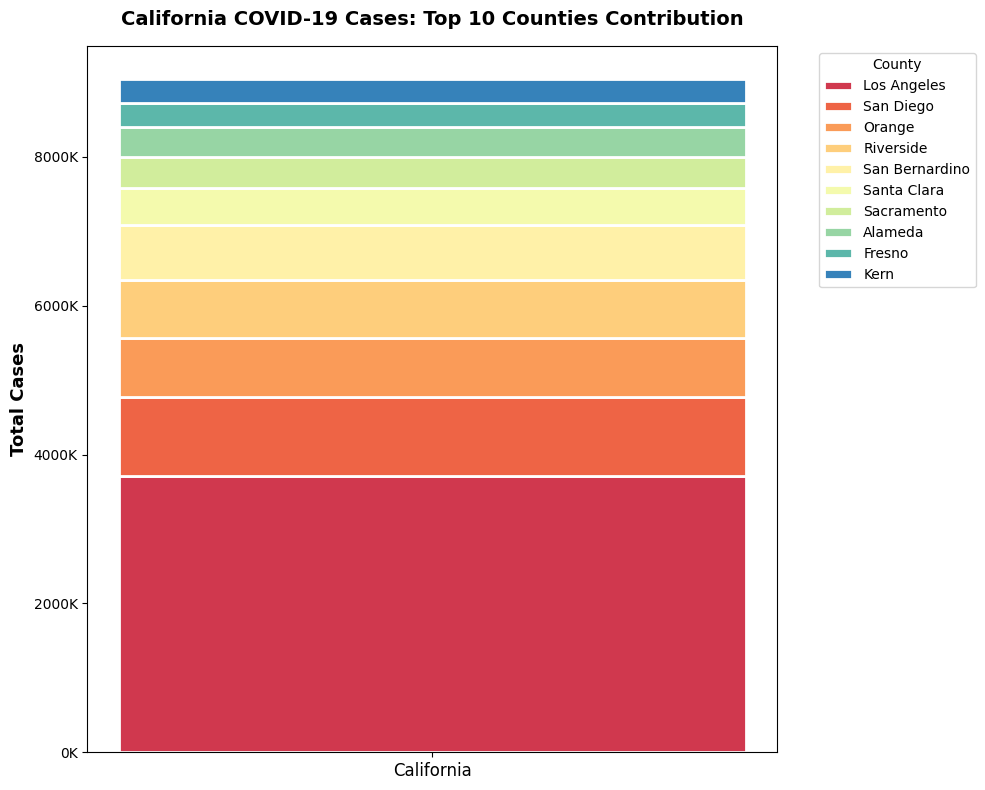

In [2]:
# Visualization 4: Stacked Bar Chart of County Contributions

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Downloads
covid_df = pd.read_csv('/Users/u1024341/Downloads/covid_data.csv')

# Visualization 4: Stacked bar chart - Get date columns
date_columns = [col for col in covid_df.columns if '/' in col]

# Select California for this visualization
selected_state = 'California'
state_data = covid_df[covid_df['Province_State'] == selected_state].copy()

# Get total cases for each county
state_data['total_cases'] = state_data[date_columns[-1]]

# Get top 10 counties by case count
top_counties = state_data.nlargest(10, 'total_cases')

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Get data for stacking
county_names = top_counties['Admin2'].tolist()
county_cases = top_counties['total_cases'].tolist()

# Create color palette
colors = sns.color_palette('Spectral', len(county_names))

# Stack the bars
bottom_position = 0
for i, (county, cases) in enumerate(zip(county_names, county_cases)):
    ax.bar(0, cases, bottom=bottom_position, color=colors[i], 
           label=county, edgecolor='white', linewidth=2)
    bottom_position += cases

# Format plot
ax.set_ylabel('Total Cases', fontsize=13, fontweight='bold')
ax.set_title(f'{selected_state} COVID-19 Cases: Top 10 Counties Contribution', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xticks([0])
ax.set_xticklabels([selected_state], fontsize=12)

# Add legend
ax.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()